# 3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. 

In [240]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv


df = pd.read_csv('circle_data.csv')
df = df.values

data = df[:20, :]
print(data)

n_row, n_col = np.shape(data)
y_label = np.zeros(n_row, dtype = int)
y_label[10: ] = 1
print(y_label)

# name of csv file
filename = "labeled_circle_data.csv"
 
# writing to csv file
with open(filename, 'w', newline='') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
 
    # writing the fields
    csvwriter.writerow(['X', 'Y', 'Label'])
 
    # writing the data rows
    for i in range(n_row):
        dummy = list(data[i])
        dummy.append(y_label[i])
        csvwriter.writerow(dummy)


[[2.6249631  2.04314858]
 [2.6072202  2.38671773]
 [4.20029333 3.38213728]
 [2.95457094 2.98627176]
 [3.30219907 2.59671411]
 [3.10585385 3.91497288]
 [2.29368185 3.36929837]
 [2.85554073 4.07289797]
 [2.54006939 2.38186603]
 [3.00090437 3.00406914]
 [6.76108664 6.45575013]
 [6.49590696 8.16642657]
 [7.6962813  6.10824267]
 [7.15462883 7.94296345]
 [6.99405033 6.2956224 ]
 [5.71716437 6.95270028]
 [5.52894862 6.56657365]
 [8.0925344  6.79639434]
 [7.05083538 6.44476526]
 [8.41582673 6.65019565]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [241]:
labeled_data = pd.read_csv('labeled_circle_data.csv')
print('------------------------The given data frame is : -----------------------------')
print(labeled_data)

# extracting the ground truth label column from the data set.
y = labeled_data[['Label']]
y = y.values

# extracting the features from the adta set.
features = labeled_data[labeled_data.columns[0 : (len(labeled_data.columns)-1)]]
features = features.values

r, c = np.shape(features)

for i in range(c):     # normalizing the features.
    features[:,i] = (features[:,i] - features[:,i].mean())/features[:,i].std()
    
x0 = np.ones((r, 1)) # for bias we concatenate one vector as a first vector.
X = np.concatenate((x0, features), axis = 1)

print('--------------------------The design matrix is :-------------------------------')
print(X)
  
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('\n -------------------- The training design matrix is : -------------------------')
print(X_train)

print('\n -------------------- The training labeled column is : -------------------------')
print(y_train)

print('\n -------------------- The testing design matrix is : -------------------------')
print(X_test)

print('\n -------------------- The testing labeled column is : -------------------------')
print(y_test)
    
    

------------------------The given data frame is : -----------------------------
           X         Y  Label
0   2.624963  2.043149      0
1   2.607220  2.386718      0
2   4.200293  3.382137      0
3   2.954571  2.986272      0
4   3.302199  2.596714      0
5   3.105854  3.914973      0
6   2.293682  3.369298      0
7   2.855541  4.072898      0
8   2.540069  2.381866      0
9   3.000904  3.004069      0
10  6.761087  6.455750      1
11  6.495907  8.166427      1
12  7.696281  6.108243      1
13  7.154629  7.942963      1
14  6.994050  6.295622      1
15  5.717164  6.952700      1
16  5.528949  6.566574      1
17  8.092534  6.796394      1
18  7.050835  6.444765      1
19  8.415827  6.650196      1
--------------------------The design matrix is :-------------------------------
[[ 1.         -1.09278218 -1.42836629]
 [ 1.         -1.10105165 -1.25813139]
 [ 1.         -0.3585652  -0.76491147]
 [ 1.         -0.93916127 -0.96105867]
 [ 1.         -0.7771416  -1.15408039]
 [ 1.         -

# Q.3.a.  Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. 

# Q.3.b. Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library. 



In [242]:
def sigmoid(z):       # defining the sugmoid function .
    val = 1/(1 + np.exp(-z))
    return val



def cost_function(w, X, y):    # defining the cost function i.e. cross entropy function.
    r, c = np.shape(X)          # where w is the vector with the parameters, and X, y are the training data.
    theta = np.zeros(r)
    error = 0
    for i in range(r):
        if(y[i] == 1):
            val1 = sigmoid(np.dot(w, X[i]))
            val1 = np.log(val1)
            error += val1
        else:
            val2 = sigmoid(np.dot(w, X[i]))
            val2 = np.log(1- val2)
            error += val2
        
    error = -(error/r)
    return error             # returning cost value.


def bracketing_method_alpha(w_start, X, y, direction, a, b, n):  # defining this function to
    d_alpha = (b - a)/n                                           # find out the interval in which optimal learning rate exist.
    w1 = a
    w2 = w1 + d_alpha
    w3 = w2 + d_alpha
    while(w3 <= b):
        x1 = w_start + w1*direction
        y1 = w_start + w2*direction
        z1 = w_start + w3*direction
        if((cost_function(x1, X, y) >= cost_function(y1, X, y)) and (cost_function(y1, X, y) <= cost_function(z1, X, y))):
            return w1, w3
        else:
            w1 = w2
            w2 = w3
            w3 = w3 + d_alpha
    if(cost_function((w_start + a*direction), X, y) > cost_function((w_start + b*direction), X, y)):
        return (b - d_alpha), b
    else:
        return a, (a + d_alpha)     # returning the sub-interval.
    

def Region_elimination_alpha(w_start, X, y, direction, a, b):
    L = b - a                                     # using region elimination method to compute the optimal learing rate.
    eps = 10e-5
    w_m = (a+b)/2
    while(L > eps):
        w_1 = a + L/4
        w_2 = b - L/4
        x1 = w_start + w_1*direction
        y1 = w_start + w_m*direction
        z1 = w_start + w_2*direction
        if(cost_function(x1, X, y) < cost_function(y1, X, y)):
            b = w_m
            w_m = w_1
        elif(cost_function(z1, X, y) < cost_function(y1, X, y)):
            a = w_m
            w_m = w_2
        else:
            a = w_1
            b = w_2   
        L = b - a
    return a          # returning the optimal learing rate i.e. alpha.
        

def Unidirectional(w_start , X, y, direction, n):   # defining this method to compute optimal learing rate.
    alpha_1 = 0
    alpha_2 = 5
    interval = bracketing_method_alpha(w_start, X, y, direction, alpha_1, alpha_2, n)  
                    # using brackting method to find out the interval in which optimal learing rate exist.
    pt = Region_elimination_alpha(w_start, X, y, direction, interval[0], interval[1])
                    # using region elimination method to compute the optimal learing rate.
    return pt
    


def fullGradient(w, X, y):   # defining the full gradient function . It computes the gradiient at the point w.
    r, c = np.shape(X)        # where w is the vector with the parameters, and X, y are the training data.
    grad = np.zeros(c)
    for i in range(r):
        grad += (sigmoid(np.dot(w, X[i])) - y[i])*X[i]
    
    grad = grad/r
    return grad        # returning the gredient at the point w.



def Gradient_descent_alpha(X_train, y_train, X_test, y_test):   # defining the Gradient_descent_alpha function to obtain optimal weight vector.
    r, c = np.shape(X_train)                 
    eps = 10e-5 
    
    iteration = 1
    iterates = []
    f1 = []
    f2 = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.
    grad = fullGradient(w, X_train, y_train)                            # by the gradient descent method.
        
    while((np.linalg.norm(w) > eps) and (iteration < 250)):   
        print(f'At {iteration}-th interation, the value of W is {w}')
        loss1 = cost_function(w, X_train, y_train)  # calculating the cost for train data using the cost function per iteration.
        f1.append(loss1)                 # And also store in a list which is named as f1.
           
        loss2 = cost_function(w, X_test, y_test)  # calculating the cost for train data using the cost function per iteration.
        f2.append(loss2)                 # And also store in a list which is named as f2.   
        
        direction = -grad
        alpha = Unidirectional(w, X_train, y_train, direction, 50) # computing learing rate by unidirectional method.
        w = w + (alpha*direction)      # iteration method : w(k+1) = w(k) + rho*direction. 
        iterates.append(w)             # where direction is steepest descent/gradient direction.
        iteration += 1
        grad = fullGradient(w, X_train, y_train)       # computing the gradient by full gradient method.
            
    
    f1 = np.array(f1).reshape((len(f1), 1))
    f2 = np.array(f2).reshape((len(f2), 1))
    return w, f1, f2                # returning the optimal parameter vector and array of costs computed at each iterations.


def Gradient_descent_alpha_fixed(X_train, y_train, X_test, y_test):   # defining the Gradient_descent_alpha function to obtain optimal weight vector.
    r, c = np.shape(X_train)                 
    eps = 10e-5  
    
    iteration = 1
    iterates = []
    f1 = []
    f2 = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.
    grad = fullGradient(w, X_train, y_train)                            # by the gradient descent method.
        
    while((np.linalg.norm(w) > eps) and (iteration < 1500)):   
        print(f'At {iteration}-th interation, the value of W is {w}')
        loss1 = cost_function(w, X_train, y_train) # calculating the cost for train data using the cost function per iteration.
        f1.append(loss1)                 # And also store in a list which is named as f.
            
        loss2 = cost_function(w, X_test, y_test)  # calculating the cost for test data using the cost function per iteration.
        f2.append(loss2) 
        
        direction = -grad
        alpha = 0.01                   # learing rate is fixed.
        w = w + (alpha*direction)      # iteration method : w(k+1) = w(k) + rho*direction. 
        iterates.append(w)             # where direction is steepest descent/gradient direction.
        iteration += 1
        grad = fullGradient(w, X_train, y_train)       # computing the gradient by full gradient method.
            
    
    f1 = np.array(f1).reshape((len(f1), 1))
    f2 = np.array(f2).reshape((len(f2), 1))
    return w, f1, f2                # returning the optimal parameter vector and array of costs computed at each iterations.


def find_class(w, X_test):
    r, c = np.shape(X_test)
    y_test_pred1 = np.zeros((r, 1), dtype = int)
    probability1 = np.zeros(r)
    
    for i in range(r):         # computing the probabilities using w1 vector and predicts labels also.
        val1 = sigmoid(np.dot(w1, X_test[i]))   
        probability1[i] = val1
        if(val1 > 0.5):
            y_test_pred1[i][0] = 1

    return y_test_pred1

    

def decision_boundary(w, X):
    length = len(X)
    
    feature1 = X[:,1]
    feature1 = sorted(feature1.reshape(length))
    
    feature2 = []
    for ele in feature1:
        val = -((w[0] + ele*w[1])/w[2])
        feature2.append(val)
        
    feature2 = np.array(feature2)
    
    # scatter plotting of Heart_diease vs smoking.
    plt.scatter(X[:, 1], X[:, 2])
    plt.plot(feature1, feature2, color='r', label = 'decision boundary')
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.title('scatter plot')
    plt.legend(loc = 'upper left')
    plt.show()
       

In [243]:
# calling gradient descent method  with fixed learning rate.
w1, f1, f2 = Gradient_descent_alpha_fixed(X_train, y_train, X_test, y_test)   
                                

At 1-th interation, the value of W is [1. 1. 1.]
At 2-th interation, the value of W is [0.99889893 1.0014557  1.00143622]
At 3-th interation, the value of W is [0.99780072 1.00290811 1.00286928]
At 4-th interation, the value of W is [0.99670535 1.00435722 1.00429921]
At 5-th interation, the value of W is [0.99561283 1.00580307 1.00572601]
At 6-th interation, the value of W is [0.99452313 1.00724565 1.00714969]
At 7-th interation, the value of W is [0.99343625 1.00868498 1.00857028]
At 8-th interation, the value of W is [0.99235217 1.01012107 1.00998777]
At 9-th interation, the value of W is [0.9912709  1.01155394 1.01140218]
At 10-th interation, the value of W is [0.9901924  1.01298359 1.01281352]
At 11-th interation, the value of W is [0.98911669 1.01441004 1.0142218 ]
At 12-th interation, the value of W is [0.98804374 1.0158333  1.01562704]
At 13-th interation, the value of W is [0.98697354 1.01725339 1.01702924]
At 14-th interation, the value of W is [0.9859061  1.0186703  1.0184284

In [244]:
print(f'The optimal weight evaluated by gradient descent method  with fixed learning rate is :')
print(w1)

optimal_loss1 = cost_function(w1, X_train, y_train)
print(f'The optimal loss at full gradient descent with fixed learning rate method is : {optimal_loss1}')


The optimal weight evaluated by gradient descent method  with fixed learning rate is :
[0.42915629 1.90942036 1.9288185 ]
The optimal loss at full gradient descent with fixed learning rate method is : 0.043542955725567774


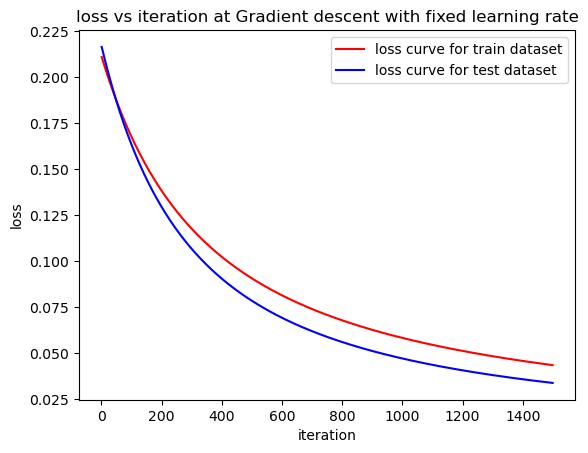

In [245]:
n_iteration1, c1 = np.shape(f1)  # array of costs at each iteration in gradient descent method with fixed learning rate.
n_iteration1 = list(range(1, n_iteration1+1))
n_iteration1 = np.array(n_iteration1).reshape((len(n_iteration1), 1))

plt.plot(n_iteration1, f1, color = 'red', label = 'loss curve for train dataset')
plt.plot(n_iteration1, f2, color = 'blue', label = 'loss curve for test dataset')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration at Gradient descent with fixed learning rate')
plt.legend()
plt.show()


-------: Decision boundary for training dataset by Gradient descent method without fixed learing rate :-----------


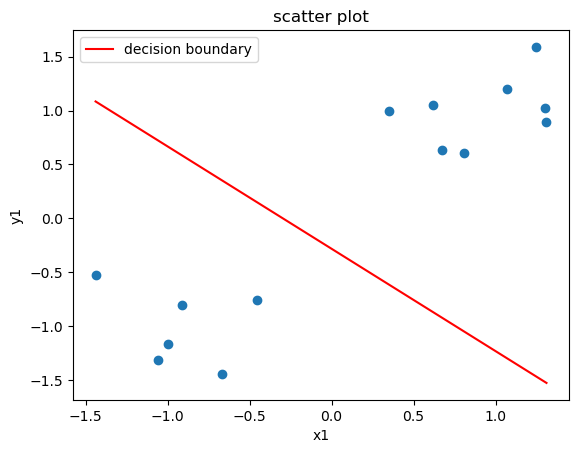

In [210]:
print('-------: Decision boundary for training dataset by Gradient descent method without fixed learing rate :-----------')

decision_boundary(w1, X_train)


-------: Decision boundary for testing dataset by Gradient descent method without fixed learing rate :-----------


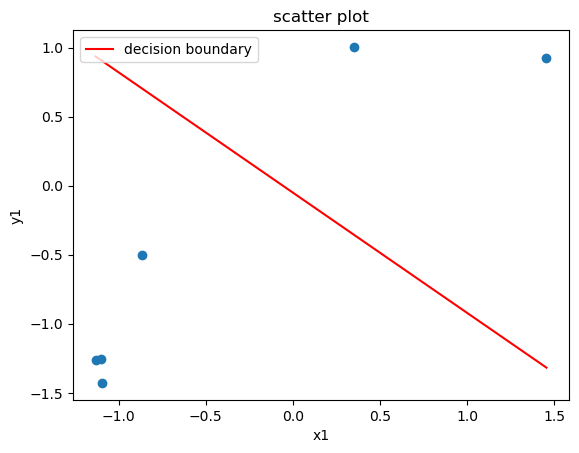

In [246]:
print('-------: Decision boundary for testing dataset by Gradient descent method without fixed learing rate :-----------')

decision_boundary(w2, X_test)


In [247]:
y_pred = find_class(w1, X_test) # w1 is the optimal weight vector computed using gradient descent with fixed learning rate.
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(X_test.shape[0]):
    if y_test[i][0] == 1:
        TP += 1
    if y_test[i][0] == 0:
        TN += 1    
    if((y_test[i][0] == 0) and (y_pred[i][0] == 1)):
        FP += 1
    if((y_test[i][0] == 1) and (y_pred[i][0] == 0)):  
        FN += 1

P = TP/(TP+FP)
R = TP/(TP+FN)
print('The precision is:', P)
print('The recall is:', R)

F1 = 2*((P*R)/(P+R))
print('The f1 score is:', F1)

Acc = (TP + TN)/(TP + FP + FN + TN)
print('The accuracy is:', Acc)

The precision is: 1.0
The recall is: 1.0
The f1 score is: 1.0
The accuracy is: 1.0


In [248]:
# calling gradient descent method  with unidirectional algorithm.
w2, f3, f4 = Gradient_descent_alpha(X_train, y_train, X_test, y_test)  


At 1-th interation, the value of W is [1. 1. 1.]
At 2-th interation, the value of W is [0.44947549 1.72783728 1.71809351]
At 3-th interation, the value of W is [0.35444236 1.93418404 1.93484675]
At 4-th interation, the value of W is [0.29963927 2.07872322 2.09042908]
At 5-th interation, the value of W is [0.26272    2.19162194 2.21422583]
At 6-th interation, the value of W is [0.23574043 2.28480744 2.31796824]
At 7-th interation, the value of W is [0.21498363 2.36438739 2.40771574]
At 8-th interation, the value of W is [0.19843029 2.4339545  2.48706101]
At 9-th interation, the value of W is [0.1848721  2.49581781 2.55833018]
At 10-th interation, the value of W is [0.17353476 2.55155642 2.62312509]
At 11-th interation, the value of W is [0.16389596 2.60230128 2.68260048]
At 12-th interation, the value of W is [0.15558887 2.64889195 2.73761888]
At 13-th interation, the value of W is [0.14834743 2.69196978 2.78884305]
At 14-th interation, the value of W is [0.14197344 2.73203633 2.8367942

In [225]:
print(f'The optimal weight evaluated by gradient descent method using unidirectional algorithm is :')
print(w2)

optimal_loss2 = cost_function(w2, X_train, y_train)
print(f'The optimal loss at full gradient descent method using unidirectional algorithm is : {optimal_loss2}')

The optimal weight evaluated by gradient descent method using unidirectional algorithm is :
[0.24395449 4.20012358 4.82391497]
The optimal loss at full gradient descent method using unidirectional algorithm is : 0.0008071447598219972


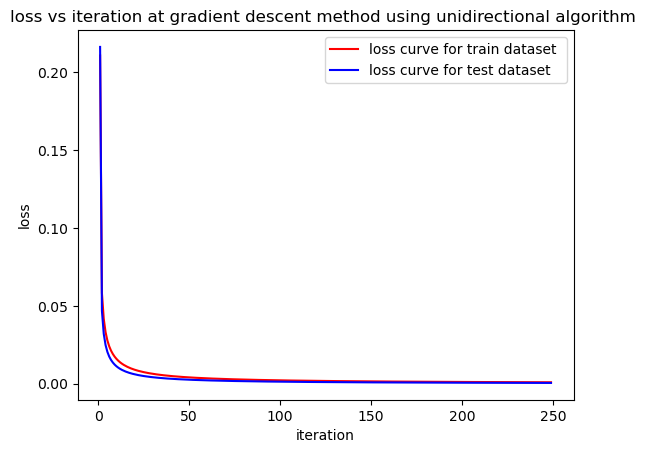

In [249]:
n_iteration2, c2 = np.shape(f3)  # array of costs at each iteration in gradient descent method using unidirectional algorithm.
n_iteration2 = list(range(1, n_iteration2+1))
n_iteration2 = np.array(n_iteration2).reshape((len(n_iteration2), 1))

plt.plot(n_iteration2, f3, color = 'red', label = 'loss curve for train dataset ')
plt.plot(n_iteration2, f4, color = 'blue', label = 'loss curve for test dataset')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration at gradient descent method using unidirectional algorithm ')
plt.legend()
plt.show()

-------: Decision boundary for training dataset by Gradient descent method without fixed learing rate :-----------


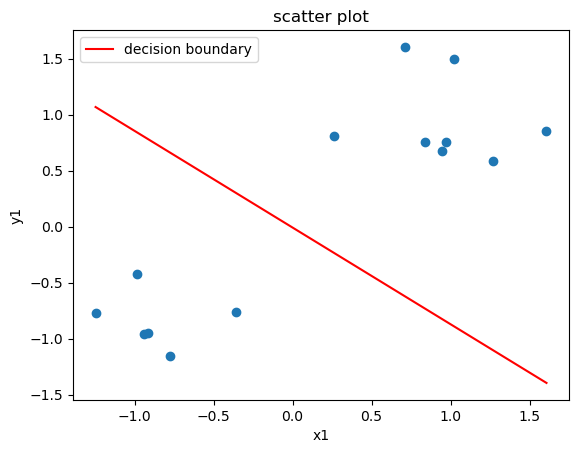

In [250]:
print('-------: Decision boundary for training dataset by Gradient descent method without fixed learing rate :-----------')

decision_boundary(w2, X_train)


-------: Decision boundary for testing dataset by Gradient descent method without fixed learing rate :-----------


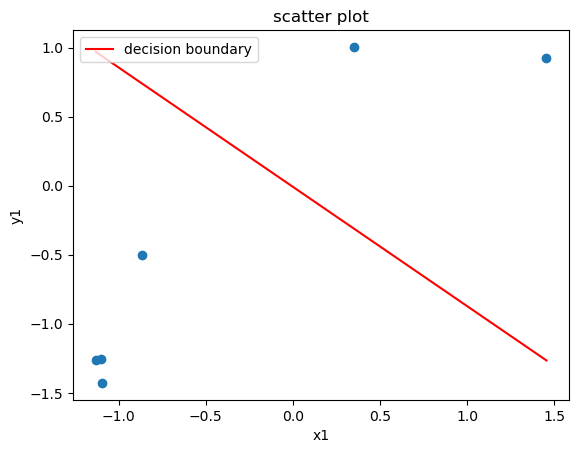

In [251]:
print('-------: Decision boundary for testing dataset by Gradient descent method without fixed learing rate :-----------')

decision_boundary(w2, X_test)


In [252]:
y_pred = find_class(w2, X_test) # w1 is the optimal weight vector computed using gradient descent without fixed learning rate.
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(X_test.shape[0]):
    if y_test[i][0] == 1:
        TP += 1
    if y_test[i][0] == 0:
        TN += 1    
    if((y_test[i][0] == 0) and (y_pred[i][0] == 1)):
        FP += 1
    if((y_test[i][0] == 1) and (y_pred[i][0] == 0)):  
        FN += 1

P = TP/(TP+FP)
R = TP/(TP+FN)
print('The precision is:', P)
print('The recall is:', R)

F1 = 2*((P*R)/(P+R))
print('The f1 score is:', F1)

Acc = (TP + TN)/(TP + FP + FN + TN)
print('The accuracy is:', Acc)

The precision is: 1.0
The recall is: 1.0
The f1 score is: 1.0
The accuracy is: 1.0


# Regularization

In [253]:
def cost_function_regularised(w, reg_para, X, y):    # defining the cost function i.e. cross entropy function.
    r, c = np.shape(X)          # where w is the vector with the parameters, and X, y are the training data.
    theta = np.zeros(r)
    error = 0
    
    w_dummy = np.zeros(c)
    w_dummy[1:] = w[1:]
    
    for i in range(r):
        if(y[i] == 1):
            val1 = sigmoid(np.dot(w, X[i]))
            val1 = np.log(val1)
            error += val1
        else:
            val2 = sigmoid(np.dot(w, X[i]))
            val2 = np.log(1- val2)
            error += val2
        
    error = -(error/r) + (reg_para*np.dot(w_dummy, w_dummy))/r
    
    return error             # returning cost value.


def fullGradient_regularised(w, reg_para, X, y):   # defining the full gradient function .
                                                   #It computes the gradiient at the point w.
    r, c = np.shape(X)        # where w is the vector with the parameters, and X, y are the training data.
    grad = np.zeros(c)
    
    w_dummy = np.zeros(c)
    w_dummy[1:] = w[1:]
    
    for i in range(r):
        grad += (sigmoid(np.dot(w, X[i])) - y[i])*X[i] 
    
    grad = grad/r + (2*reg_para/r)*w_dummy
    
    return grad        # returning the gredient at the point w.



# defining the Gradient_descent_alpha function to obtain optimal weight vector.
def Gradient_descent_alpha_fixed_regularised(reg_para, X_train, y_train, X_test, y_test):   
    r, c = np.shape(X_train)                 
    eps = 10e-5  
    
    iteration = 1
    iterates = []
    f1 = []
    f2 = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.
    grad = fullGradient_regularised(w, reg_para, X_train, y_train)                            # by the gradient descent method.
        
    while((np.linalg.norm(w) > eps) and (iteration < 2000)):   
        print(f'At {iteration}-th interation, the value of W is {w}')
        loss1 = cost_function_regularised(w, reg_para, X_train, y_train) # calculating the cost for train data using the cost function per iteration.
        f1.append(loss1)                 # And also store in a list which is named as f.
            
        loss2 = cost_function_regularised(w, reg_para, X_test, y_test)  # calculating the cost for test data using the cost function per iteration.
        f2.append(loss2) 
        
        direction = -grad
        alpha = 0.01                   # learing rate is fixed.
        w = w + (alpha*direction)      # iteration method : w(k+1) = w(k) + rho*direction. 
        iterates.append(w)             # where direction is steepest descent/gradient direction.
        iteration += 1
        grad = fullGradient_regularised(w, reg_para, X_train, y_train)       # computing the gradient by full gradient method.
            
    
    f1 = np.array(f1).reshape((len(f1), 1))
    f2 = np.array(f2).reshape((len(f2), 1))
    return w, f1, f2                # returning the optimal parameter vector and array of costs computed at each iterations.



In [254]:
# calling gradient descent method  with fixed learning rate.
reg_para = 0.01
w3, f5, f6 = Gradient_descent_alpha_fixed_regularised(reg_para, X_train, y_train, X_test, y_test)   

At 1-th interation, the value of W is [1. 1. 1.]
At 2-th interation, the value of W is [0.99889893 1.00144142 1.00142193]
At 3-th interation, the value of W is [0.9978007  1.00287954 1.00284071]
At 4-th interation, the value of W is [0.99670531 1.00431439 1.00425637]
At 5-th interation, the value of W is [0.99561274 1.00574596 1.0056689 ]
At 6-th interation, the value of W is [0.99452298 1.00717428 1.00707832]
At 7-th interation, the value of W is [0.99343603 1.00859935 1.00848464]
At 8-th interation, the value of W is [0.99235187 1.0100212  1.00988788]
At 9-th interation, the value of W is [0.99127048 1.01143982 1.01128804]
At 10-th interation, the value of W is [0.99019188 1.01285524 1.01268513]
At 11-th interation, the value of W is [0.98911603 1.01426746 1.01407918]
At 12-th interation, the value of W is [0.98804293 1.01567649 1.01547018]
At 13-th interation, the value of W is [0.98697258 1.01708235 1.01685815]
At 14-th interation, the value of W is [0.98590496 1.01848505 1.0182431

In [255]:
print(f'The optimal weight evaluated by gradient descent method using unidirectional algorithm is :')
print(w3)

optimal_loss3 = cost_function(w3, X_train, y_train)
print(f'The optimal loss at full gradient descent method using unidirectional algorithm is : {optimal_loss3}')

The optimal weight evaluated by gradient descent method using unidirectional algorithm is :
[0.36532608 2.01290989 2.04227707]
The optimal loss at full gradient descent method using unidirectional algorithm is : 0.03654968167851728


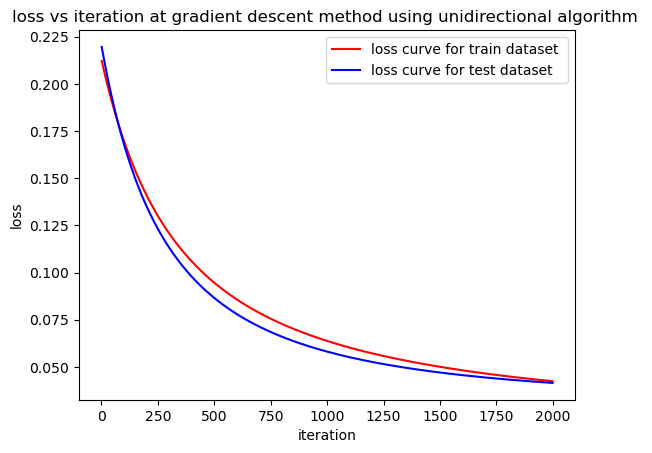

In [256]:
n_iteration3, c3 = np.shape(f5)  # array of costs at each iteration in gradient descent method using unidirectional algorithm.
n_iteration3 = list(range(1, n_iteration3+1))
n_iteration3 = np.array(n_iteration3).reshape((len(n_iteration3), 1))

plt.plot(n_iteration3, f5, color = 'red', label = 'loss curve for train dataset ')
plt.plot(n_iteration3, f6, color = 'blue', label = 'loss curve for test dataset')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration at gradient descent method using unidirectional algorithm ')
plt.legend()
plt.show()

-------: Decision boundary for training dataset by Gradient descent method with fixed learing rate :-----------


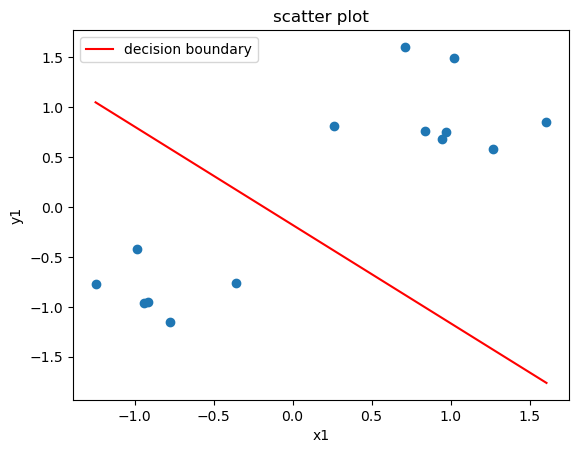

In [257]:
print('-------: Decision boundary for training dataset by Gradient descent method with fixed learing rate :-----------')

decision_boundary(w3, X_train)


-------: Decision boundary for testing dataset by Gradient descent method with fixed learing rate :-----------


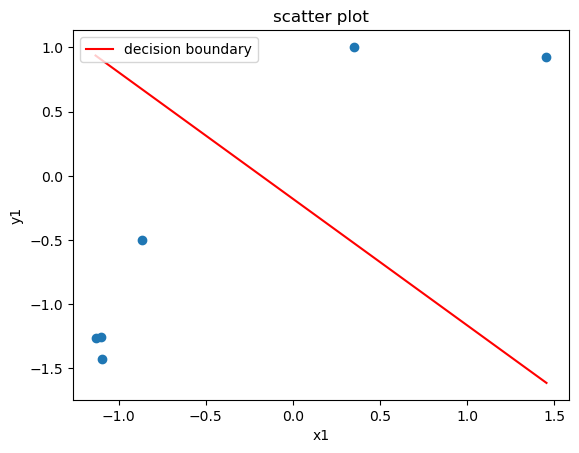

In [258]:
print('-------: Decision boundary for testing dataset by Gradient descent method with fixed learing rate :-----------')

decision_boundary(w3, X_test)


In [259]:
y_pred = find_class(w3, X_test) # w1 is the optimal weight vector computed using gradient descent with fixed learning rate.
TP = 0                              # In this case, we use regularization.
TN = 0
FP = 0
FN = 0
for i in range(X_test.shape[0]):
    if y_test[i][0] == 1:
        TP += 1
    if y_test[i][0] == 0:
        TN += 1    
    if((y_test[i][0] == 0) and (y_pred[i][0] == 1)):
        FP += 1
    if((y_test[i][0] == 1) and (y_pred[i][0] == 0)):  
        FN += 1

P = TP/(TP+FP)
R = TP/(TP+FN)
print('The precision is:', P)
print('The recall is:', R)

F1 = 2*((P*R)/(P+R))
print('The f1 score is:', F1)

Acc = (TP + TN)/(TP + FP + FN + TN)
print('The accuracy is:', Acc)

The precision is: 1.0
The recall is: 1.0
The f1 score is: 1.0
The accuracy is: 1.0
